# [데이터마이닝 프로젝트]

# 학번: 21522016  &nbsp; 이름: 김진홍

# 주제) Bank loan modeling

# 1. Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df = dataset.copy()
df.columns = ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df=df.drop(columns=['ID', 'ZIP Code'])

# 2. Preprocessing

In [5]:
from sklearn.preprocessing import OneHotEncoder

target = df['Personal Loan'].copy()
numeric = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']].copy()
categorical = df[['Securities Account','CD Account','Online','CreditCard']].copy()

In [6]:
data = pd.concat([numeric, categorical], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(data)
scaled_data = scaler_.transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2913,0.363636,0.326087,0.310185,0.666667,0.233,0.5,0.000000,0.0,0.0,1.0,1.0
3275,0.204545,0.239130,0.263889,0.000000,0.120,0.0,0.422047,0.0,0.0,1.0,0.0
775,0.954545,0.913043,0.069444,0.666667,0.070,0.5,0.000000,0.0,0.0,0.0,1.0
217,0.363636,0.369565,0.305556,0.666667,0.300,0.0,0.000000,0.0,0.0,0.0,0.0
1245,0.522727,0.521739,0.152778,0.000000,0.140,1.0,0.201575,0.0,0.0,1.0,0.0


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
x_train = x_train_over
y_train = y_train_over

In [10]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.363636,0.326087,0.310185,0.666667,0.233,0.5,0.000000,0.0,0.0,1.0,1.0
1,0.204545,0.239130,0.263889,0.000000,0.120,0.0,0.422047,0.0,0.0,1.0,0.0
2,0.954545,0.913043,0.069444,0.666667,0.070,0.5,0.000000,0.0,0.0,0.0,1.0
3,0.363636,0.369565,0.305556,0.666667,0.300,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.522727,0.521739,0.152778,0.000000,0.140,1.0,0.201575,0.0,0.0,1.0,0.0


# 3-1. Stable DT

In [11]:
from tool.stableDT import stableDecisionTree # file 제공
from tool.stableDT import visualize_tree # file 제공

In [12]:
min_sample_ratio = 0.01 # 최소 샘플 수로 dataset의 샘플 수의 1%
impurity_measure='entropy'
iter_num=10

clf = stableDecisionTree(
    min_sample = min_sample_ratio*np.shape(data)[0], 
    iter_num = iter_num,
    impurity_measure = impurity_measure)
clf.fit(x_train, y_train)

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(x_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
pre = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
acc, f1, pre, recall

(0.902, 0.6287878787878788, 0.47701149425287354, 0.9222222222222223)

In [14]:
cm = confusion_matrix(y_test, pred_y)
print(cm)
#       실제값
#      N          P
#예 N (TN)      (FN)
#측 P (FP)      (TP)

[[819  91]
 [  7  83]]


In [15]:
clf.export_text()

IF Income > 0.3981 AND Education > 0.0 AND Income > 0.4954 THEN y = 1
IF Income > 0.3981 AND Education <= 0.0 AND Family > 0.3333 AND Income > 0.5205 THEN y = 1
IF Income <= 0.3981 AND CCAvg > 0.29 AND Income > 0.3565 THEN y = 1
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 AND CCAvg > 0.24 AND Family > 0.3333 AND Age > 0.6869 THEN y = 1
IF Income > 0.3981 AND Education <= 0.0 AND Family > 0.3333 AND Income <= 0.5205 THEN y = 1
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 AND CCAvg > 0.24 AND Family <= 0.3333 AND Income <= 0.4471 THEN y = 1
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 AND CCAvg > 0.24 AND Family <= 0.3333 AND Income > 0.4471 THEN y = 1
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 AND CCAvg > 0.24 AND Family > 0.3333 AND Age <= 0.6869 THEN y = 1
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 AND CCAvg <= 0.24 AND Income > 0.4676 THEN y = 0
IF Income > 0.3981 AND Education > 0.0 AND Income <= 0.4954 

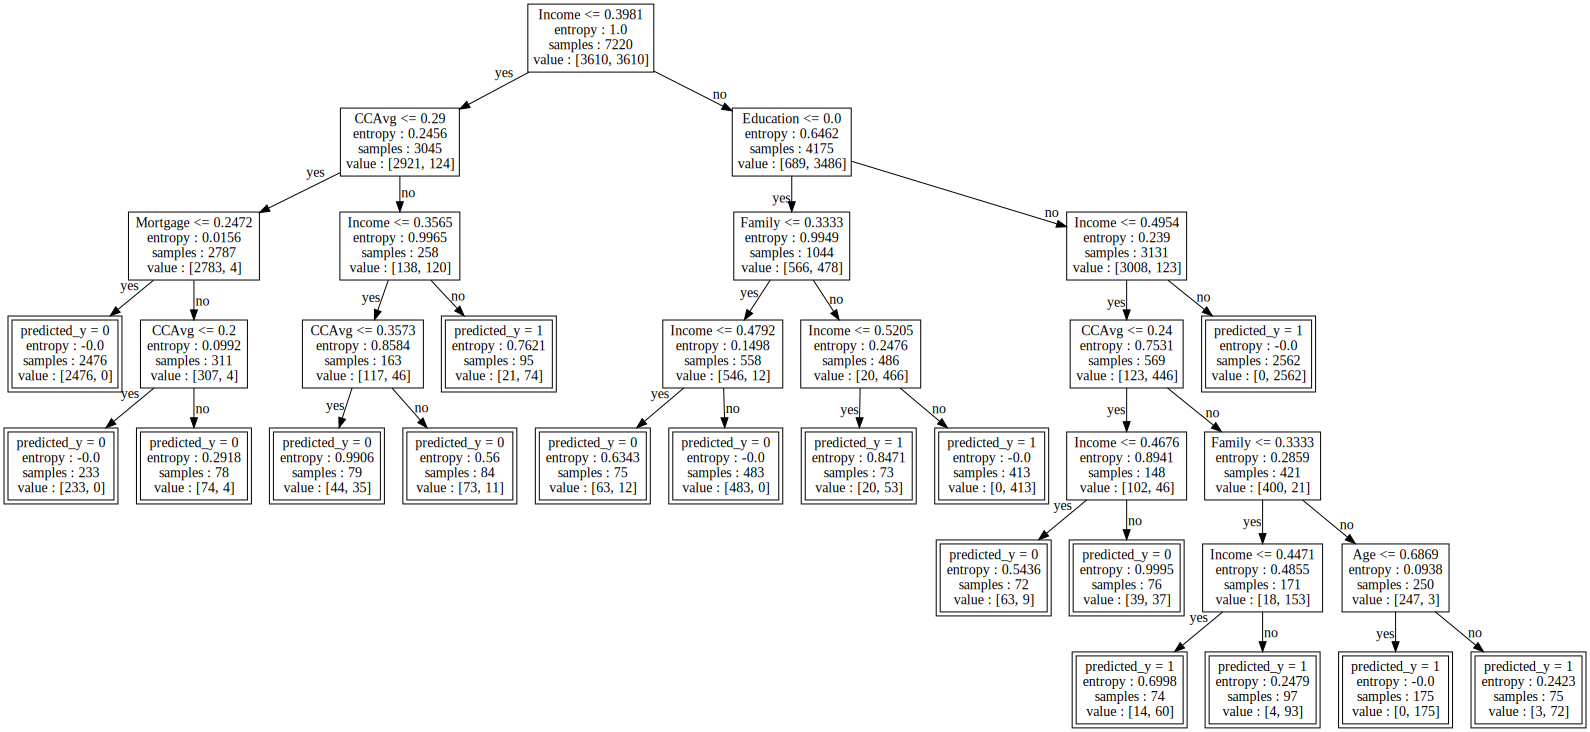

In [16]:
visualize_tree(clf.root)

# 3-2. Stable CRI

In [12]:
from tool.stableCRI import stable_concise_rule_induction # file 제공
from sklearn.model_selection import train_test_split

dataset2 = dataset.copy()
dataset2.columns = ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
dataset2 = dataset2.drop(columns=['ID', 'ZIP Code'])

scaler = MinMaxScaler()
scaler.fit(dataset2)
dataset3 = scaler.transform(dataset2)
dataset3 = pd.DataFrame(dataset3, columns=dataset2.columns)

target_name = 'Personal Loan' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset3.columns
x = dataset3.reindex(columns = colnm[colnm != target_name])
y = dataset3.reindex(columns = colnm[colnm == target_name])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

smote = SMOTE(random_state=11)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
x_train = x_train_over
y_train = y_train_over

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

In [13]:
df_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0.363636,0.326087,0.310185,0.666667,0.233000,0.5,0.000000,0.0,0.0,1.0,1.0,0.0
1,0.204545,0.239130,0.263889,0.000000,0.120000,0.0,0.422047,0.0,0.0,1.0,0.0,0.0
2,0.954545,0.913043,0.069444,0.666667,0.070000,0.5,0.000000,0.0,0.0,0.0,1.0,0.0
3,0.363636,0.369565,0.305556,0.666667,0.300000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.522727,0.521739,0.152778,0.000000,0.140000,1.0,0.201575,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7215,0.238638,0.239130,0.733809,0.000000,0.280001,1.0,0.000000,0.0,0.0,1.0,0.0,1.0
7216,0.219882,0.234418,0.495370,1.000000,0.299756,0.5,0.000000,0.0,0.0,1.0,0.0,1.0
7217,0.621560,0.607681,0.614883,0.798444,0.138607,1.0,0.503534,0.0,0.0,1.0,0.0,1.0
7218,0.828900,0.803525,0.563325,0.333333,0.343210,0.5,0.141438,0.0,1.0,1.0,1.0,1.0


In [14]:
min_sample_ratio = 0.02
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 10 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 5, rule_rate = 0.9) 

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y, acc, f1 = cri.predict(df_test)
acc, f1

(0.983, 0.9484)

In [16]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[901   9]
 [  8  82]]


In [17]:
cri.export_text()

IF ['Income < 0.2569444444444444'] THEN Personal Loan = 0.0   (homogeneity = 1.0 , coverage = 0.2729 )
IF ['Income < 0.3429433513120812'] THEN Personal Loan = 0.0   (homogeneity = 0.9904 , coverage = 0.3622 )


In [18]:
cri.df_concise_rule

,0,1
Rule,Income < 0.2569444444444444,Income < 0.3429433513120812
pred_y,0,0
Homogeneity,1.0,0.9904
Coverage,0.2729,0.3622
# of condition,1.0,1.0


In [19]:
cri.others_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
5,0.159091,0.195652,0.402778,0.333333,0.020000,0.0,0.000000,1.0,0.0,1.0,0.0,0.0
10,0.681818,0.695652,0.615741,0.333333,0.020000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0
21,0.750000,0.717391,0.787037,0.000000,0.290000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0
22,0.659091,0.673913,0.740741,0.666667,0.650000,1.0,0.185827,0.0,0.0,1.0,0.0,1.0
27,0.931818,0.913043,0.356481,1.000000,0.340000,0.5,0.314961,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7215,0.238638,0.239130,0.733809,0.000000,0.280001,1.0,0.000000,0.0,0.0,1.0,0.0,1.0
7216,0.219882,0.234418,0.495370,1.000000,0.299756,0.5,0.000000,0.0,0.0,1.0,0.0,1.0
7217,0.621560,0.607681,0.614883,0.798444,0.138607,1.0,0.503534,0.0,0.0,1.0,0.0,1.0
7218,0.828900,0.803525,0.563325,0.333333,0.343210,0.5,0.141438,0.0,1.0,1.0,1.0,1.0
